# Color Evaluation
In this notebook, we evaluate the CVCL model on our konkle object dataset that has been augmented with more colors.

## Part 1: Color Annotations
First, we read in the annotations for different colors. Each color corresponds to a separate csv file that contains annotations from multiple annotators.

In [186]:
import csv, os
from collections import defaultdict, Counter

COLORS_TEST = [
    "blue",
    "red",
    "yellow",
    "green",
    "brown",
    # "orange",
    "pink",
    "purple"
]

color_to_images_dict = {}
image_to_colors_dict = defaultdict(list)

for c in COLORS_TEST:
    with open(f"annotations/Color Annotation - {c}.csv") as f:
        lines = csv.DictReader(f)
        lines = list(set([(l["annotator"], l["image_id"]) for l in lines])) # set to remove duplicates within one csv
        for i,l in enumerate(lines):
            if not l[1].endswith(".jpg"): # manually correct suffix for image id if annotators forget them
                lines[i] = (l[0], l[1]+".jpg")
        lines = [l for l in lines if os.path.isfile("konkle_objects_colored/"+l[1])] # remove annotations if image not in file
        image_ids = [l[1] for l in lines]
        color_to_images_dict[c] = image_ids

        # populate image to colors dict
        for img in image_ids:
            # if c not in image_to_colors_dict[img]:
                image_to_colors_dict[img].append(c)

for key in color_to_images_dict:
    print(f"{key}: {len(set(color_to_images_dict[key]))} images.")

unable_to_resolve = []
# print the file names of images that are marked with more than one color
for key in image_to_colors_dict:
    counter = dict(Counter(image_to_colors_dict[key]))

    max_count = max(counter.values())  # Find the highest count
    highest = [key for key, count in counter.items() if count == max_count]  # Return all keys with the max count
    assert len(highest) == len(set(highest))
    if len(highest) == 1:
        image_to_colors_dict[key] = highest[0]
    else:
        unable_to_resolve.append(key) # store the images with ties

print(f"Before removing: {len(image_to_colors_dict)}")
for u in unable_to_resolve:
    del image_to_colors_dict[u]
print(f"After removing: {len(image_to_colors_dict)}")

for c in color_to_images_dict:
    print(f"Before removing in {c}: {len(color_to_images_dict[c])}")
    color_to_images_dict[c] = [img for img in color_to_images_dict[c] if img not in unable_to_resolve]
    print(f"After removing in {c}: {len(color_to_images_dict[c])}")

all_images_with_annotations = list(image_to_colors_dict.keys()) # remove duplicates
print(f"There are {len(all_images_with_annotations)} images that are annotated with color after resolving conflicts")


blue: 100 images.
red: 48 images.
yellow: 63 images.
green: 144 images.
brown: 34 images.
pink: 53 images.
purple: 75 images.
Before removing: 444
After removing: 420
Before removing in blue: 192
After removing in blue: 189
Before removing in red: 97
After removing in red: 87
Before removing in yellow: 150
After removing in yellow: 128
Before removing in green: 273
After removing in green: 252
Before removing in brown: 51
After removing in brown: 44
Before removing in pink: 87
After removing in pink: 81
Before removing in purple: 126
After removing in purple: 121
There are 420 images that are annotated with color after resolving conflicts


## Part 2: Object Categories
We can find the mapping between object kind to a list of objects of that kind.

In [187]:
import os

folder_path = 'konkle_objects_colored' 
id_to_object = defaultdict(list)
object_to_id = {}
for fn in os.listdir(folder_path):
    if fn in all_images_with_annotations:
        if fn.lower().endswith(".jpg"):
            assert "_s_" in fn
            object_name = fn.split("_s_")[0]
            object_kind = int(fn.split("_s_")[1].split(".")[0]) % 2 # for images with the same prefix, even 
            object_id = object_name + str(object_kind)
            
            id_to_object[object_id].append(fn)

            object_to_id[fn] = object_id
        
for object_id in id_to_object:
    print(f"There are {len(id_to_object[object_id])} in {object_id}.")

There are 5 in tool_box_rot0.
There are 3 in valve_rot0.
There are 5 in extension_cord_rot1.
There are 5 in container_open_rot0.
There are 4 in handbag_rot0.
There are 5 in takeout_container_rot1.
There are 5 in cardboard_rot0.
There are 4 in theater_seats_rot1.
There are 5 in gloves_rot0.
There are 5 in sponge_rot0.
There are 4 in pail_rot1.
There are 5 in notebook_rot0.
There are 4 in razor_rot1.
There are 5 in notebook_rot1.
There are 5 in sponge_rot1.
There are 5 in gloves_rot1.
There are 4 in theater_seats_rot0.
There are 5 in fuel_tank_rot1.
There are 5 in cardboard_rot1.
There are 5 in takeout_container_rot0.
There are 5 in handbag_rot1.
There are 5 in container_open_rot1.
There are 4 in truck_rot0.
There are 5 in tape_dispenser_rot1.
There are 3 in valve_rot1.
There are 3 in sugar_bowl_rot0.
There are 4 in controlbox_rot0.
There are 5 in gift_box_rot1.
There are 3 in pail_rot0.
There are 3 in tissues_rot1.
There are 4 in notecards_rot1.
There are 5 in notecards_rot0.
There are 

For the id_to_object dictionary, we remove image files that are not annotated with any color.

In [188]:
for object_id in id_to_object:
    id_to_object[object_id] = [fn for fn in id_to_object[object_id] if fn in all_images_with_annotations]


for object_id in id_to_object:
    print(f"There are {len(id_to_object[object_id])} in {object_id}.")

There are 5 in tool_box_rot0.
There are 3 in valve_rot0.
There are 5 in extension_cord_rot1.
There are 5 in container_open_rot0.
There are 4 in handbag_rot0.
There are 5 in takeout_container_rot1.
There are 5 in cardboard_rot0.
There are 4 in theater_seats_rot1.
There are 5 in gloves_rot0.
There are 5 in sponge_rot0.
There are 4 in pail_rot1.
There are 5 in notebook_rot0.
There are 4 in razor_rot1.
There are 5 in notebook_rot1.
There are 5 in sponge_rot1.
There are 5 in gloves_rot1.
There are 4 in theater_seats_rot0.
There are 5 in fuel_tank_rot1.
There are 5 in cardboard_rot1.
There are 5 in takeout_container_rot0.
There are 5 in handbag_rot1.
There are 5 in container_open_rot1.
There are 4 in truck_rot0.
There are 5 in tape_dispenser_rot1.
There are 3 in valve_rot1.
There are 3 in sugar_bowl_rot0.
There are 4 in controlbox_rot0.
There are 5 in gift_box_rot1.
There are 3 in pail_rot0.
There are 3 in tissues_rot1.
There are 4 in notecards_rot1.
There are 5 in notecards_rot0.
There are 

## Part 3: Combining Color Annotations with Object Categories

Now that we have mappings between colors and images and between object categories and images, we can start to create our evaluation dataset.

Each data point is framed as a question, a set of choices, and the correct answer(s).

- When the question is a color text, the set of choices is a list of images. 
- When the question is an image, the set of choices is color terms. 

First, we generate the part where we give models a color text and ask it to choose between images of the same object kind but in different colors.

In [189]:
# check images that are annotated with multiple colors have unique color annotations in the object class. In other words
# we do not want two images in the same class that can both be classified as red
for obj_id in id_to_object:
    annotations = [image_to_colors_dict[fn] for fn in id_to_object[obj_id]]
    # print(annotations)
    try:
        assert len(annotations) == len(set(annotations))
    except:
        AssertionError(print(annotations))
        # AssertionError(print(list(zip(annotations, id_to_object[obj_id]))))

['green', 'blue', 'blue']
['green', 'red', 'purple', 'purple', 'green']
['yellow', 'green', 'pink', 'blue', 'pink']
['yellow', 'green', 'pink', 'purple', 'green']
['pink', 'brown', 'blue', 'green', 'blue']
['red', 'green', 'green', 'purple', 'blue']
['blue', 'purple', 'green', 'red', 'green']
['purple', 'green', 'green', 'blue', 'red']
['blue', 'red', 'green', 'green', 'purple']
['brown', 'blue', 'blue', 'pink', 'green']
['green', 'green', 'blue', 'red', 'purple']
['green', 'purple', 'pink', 'green', 'yellow']
['green', 'pink', 'pink', 'yellow', 'blue']
['yellow', 'green', 'blue', 'blue']
['purple', 'purple', 'brown', 'green', 'green']
['green', 'blue', 'blue']
['blue', 'blue', 'green']
['green', 'purple', 'brown', 'blue', 'green']
['purple', 'blue', 'purple']
['blue', 'purple', 'green', 'green']
['green', 'green', 'brown', 'purple', 'blue']
['green', 'red', 'green', 'purple', 'blue']
['blue', 'yellow', 'green', 'blue']
['purple', 'green', 'green', 'purple', 'brown']
['red', 'blue', 'b

In [383]:
from collections import Counter
data = []
for obj_id in id_to_object:
    annotations = [image_to_colors_dict[fn] for fn in id_to_object[obj_id]]
    image_and_gold_annotation_pairs = [(fn, image_to_colors_dict[fn]) for fn in id_to_object[obj_id]]    

    no_overlap = True

    if len(set(annotations)) != len(annotations): # if there are overlap of colors:
        no_overlap = False

    
    
    # colors that appear more than once
    counts = Counter(annotations)
    duplicates = [item for item, count in counts.items() if count > 1]
    
    if no_overlap:
        for fn, g in image_and_gold_annotation_pairs:
            d = {}
            
            d["question"] = g
            d["choices"] = id_to_object[obj_id] # all files under this obj_id can be choices
            d["correct"] = [fn]
            d["type"] = 0 # given color term choose image
            data.append(d)

    # elif not one_to_one and no_overlap: # multiple annotations for one image but there is no overlap of colors between images:
    #     for fn, gs in image_and_gold_annotation_pairs:
    #         for g in gs:
    #             d = {}

    #             d["question"] = g
    #             d["choices"] = id_to_object[obj_id]
    #             d["correct"] = [fn]
    #             d["type"] = 0
    #             data.append(d)

    elif not no_overlap: # if there is overlap
        assert len(duplicates) >= 1
        for color in counts.keys():
            d = {}
            d["question"] = color
            d["choices"] = id_to_object[obj_id]
            d["correct"] = [fn for fn in d["choices"] if color in image_to_colors_dict[fn]] # if current question color exists in the annotations list
            d["type"] = 0
            if len(d["correct"]) <= 1: # forbid duplicates to be questions
                data.append(d)     
                  
        
        


print(f"This part of the dataset contains {len(data)} items.")

This part of the dataset contains 317 items.


Second, we generate the part where we give models an image and a set of color terms to choose from.

In [384]:
import random

print(f"The dataset size is {len(data)}.")
for image_fn in all_images_with_annotations:
    d = {}
    d["question"] = image_fn
    d["correct"] = [image_to_colors_dict[image_fn]]
    d["choices"] = [d["correct"][0]] # first append in the correct choice
    remaining_choices = [c for c in COLORS_TEST if c != d["choices"][0]]
    d["choices"] += random.sample(remaining_choices, k=3) # randomly pick three choices that are not 
    if len(d["choices"]) != len(set(d["choices"])):
        print(d, remaining_choices)
    assert len(d["choices"]) == len(set(d["choices"]))
    d["type"] = 1
    data.append(d)

print(f"The dataset size is {len(data)}.")

import pandas as pd
data_df = pd.DataFrame(data)
data_df.to_csv("color_evaluation_dataset.csv", index=False)


The dataset size is 317.
The dataset size is 737.


## Part 4: Evaluation

We now run the CVCL model on our dataset.

In [192]:
import torch
from multimodal.multimodal_lit import MultiModalLitModel

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print("Loading model...")
cvcl, preprocess = MultiModalLitModel.load_model(model_name="cvcl")
cvcl = cvcl.to(device)
cvcl.eval()

Loading model...


/Users/mirandazhu/anaconda3/envs/schuster/lib/python3.8/site-packages/pytorch_lightning/utilities/parsing.py:244: UserWarning: Attribute 'vision_encoder' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['vision_encoder'])`.
  rank_zero_warn(
/Users/mirandazhu/anaconda3/envs/schuster/lib/python3.8/site-packages/pytorch_lightning/utilities/parsing.py:244: UserWarning: Attribute 'text_encoder' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['text_encoder'])`.
  rank_zero_warn(


MultiModalLitModel(
  (vision_encoder): VisionEncoder(
    (model): ResNet(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stat

In [114]:
from torchvision import transforms
from PIL import Image
import torch.nn.functional as F

# encoding images
normalizer = transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # normalize each channel

preprocess = transforms.Compose([
            transforms.Resize((224, 224),
                              interpolation=transforms.InterpolationMode.BICUBIC),
            transforms.ToTensor(),
            normalizer,
        ])
vocab_dict = cvcl.vocab

We encode every image using the CVCL model and save the embeddings in a pickle file.

In [298]:
import pickle
from tqdm import tqdm

embeddings = {}
embeddings_rotated = {90: {},
                      180:{},
                      270:{}}
embeddings_resized = {"height_0.25": {},
                      "height_0.50":{},
                      "width_0.25":{},
                      "width_0.50":{}

}

for fn in tqdm(all_images_with_annotations):
    I = preprocess(Image.open(f"konkle_objects_colored/{fn}").convert('RGB')).unsqueeze(0).to(device)
    image_features, _ = cvcl.model.encode_image(I)
    embeddings[fn] = image_features

with open("konkle_embeddings.pkl", "wb") as file:
    pickle.dump(embeddings, file)

for degree in [90, 180, 270]:
    for fn in tqdm(all_images_with_annotations):
        I = preprocess(Image.open(f"rotated_konkle_objects_colored/{fn.split('.')[0]}_rotated_{str(degree)}.jpg").convert('RGB')).unsqueeze(0).to(device)
        image_features, _ = cvcl.model.encode_image(I)
        embeddings_rotated[degree][fn] = image_features

with open("konkle_rotated_embeddings.pkl", "wb") as file:
    pickle.dump(embeddings_rotated, file)

for key in embeddings_resized:
    dim, size = key.split("_")[0], key.split("_")[1]
    for fn in tqdm(all_images_with_annotations):
        I = preprocess(Image.open(f"resized_konkle_objects_colored/{fn.split('.')[0]}_{dim}_scaled_{size}.jpg").convert('RGB')).unsqueeze(0).to(device)
        image_features, _ = cvcl.model.encode_image(I)
        embeddings_resized[key][fn] = image_features
    
with open("konkle_resized_embeddings.pkl", "wb") as file:
    pickle.dump(embeddings_resized, file)


100%|██████████| 420/420 [00:22<00:00, 18.52it/s]


In [299]:
# Load Embeddings:

with open("konkle_embeddings.pkl", "rb") as file:
    embeddings = pickle.load(file)

with open("konkle_rotated_embeddings.pkl", "rb") as file:
    embeddings_rotated = pickle.load(file)

with open("konkle_resized_embeddings.pkl", "rb") as file:
    embeddings_resized = pickle.load(file)


In [300]:
def get_embedding(mode, fn):
    if mode == "base":
        return embeddings[fn]
    elif mode == "rotated_90":
        return embeddings_rotated[90][fn]
    elif mode == "rotated_180":
        return embeddings_rotated[180][fn]
    elif mode == "rotated_270":
        return embeddings_rotated[270][fn]
    elif mode in ["height_0.50", "height_0.25", "width_0.50", "width_0.25"]:
        return embeddings_resized[mode][fn]

In [455]:
import numpy as np 
from tqdm import tqdm
import random

mode = "width_0.25"

color_to_index = {color: i for i, color in enumerate(COLORS_TEST)}

confusion_matrix_type0 = np.zeros((len(COLORS_TEST), len(COLORS_TEST)))
confusion_matrix_type1 = np.zeros((len(COLORS_TEST), len(COLORS_TEST)))

for d in tqdm(data):
    assert len(d["correct"]) == 1
    scores = [[] for i in d["choices"]]

    if d["type"] == 0: # one text, multiple images
        text = torch.tensor([vocab_dict[d["question"]]]).unsqueeze(0).to(device)
        text_len = torch.tensor([len(text)], dtype=torch.long).to(device)
        text_features, _ = cvcl.model.encode_text(text, text_len) # size = 1 by 512

        for j, fn in enumerate(d["choices"]):
            image_features = get_embedding(mode, fn)
            distance_score = F.pairwise_distance(image_features, text_features, p=2).item() # the smaller the closer
            scores[j] = distance_score


    elif d["type"] == 1: # one image, multiple texts
        image_features = get_embedding(mode, fn)

        for j, color_term in enumerate(d["choices"]):
            text = torch.tensor([vocab_dict[color_term]]).unsqueeze(0).to(device)
            text_len = torch.tensor([len(text)], dtype=torch.long).to(device)
            text_features, _ = cvcl.model.encode_text(text, text_len) # size = 1 by 512
            distance_score = F.pairwise_distance(image_features, text_features, p=2).item() # the smaller the closer
            scores[j] = distance_score
    

    # if len(d["correct"]) == 1:
    #     model_response_idx = np.argmin(scores)
    #     if model_response_idx == d["choices"].index(d["correct"][0]):
    #         d["accuracy"] = 1
    #     else:
    #         d["accuracy"] = 0
    # else:
    #     correct_choices_index = [d["choices"].index(content) for content in d["correct"]]
    #     average_distance_for_correct_choices = sum(scores[i] for i in correct_choices_index) / len(correct_choices_index)
    #     wrong_choices_index = [d["choices"].index(content) for content in d["choices"] if content not in d["correct"]]
    #     assert len(set(correct_choices_index+wrong_choices_index)) == len(correct_choices_index) + len(wrong_choices_index) # assert disjoint
    #     average_distance_for_incorrect_choices = sum(scores[i] for i in wrong_choices_index) / len(wrong_choices_index)
    #     if average_distance_for_correct_choices < average_distance_for_incorrect_choices:
    #         d["accuracy"] = 1
    #     else:
    #         d["accuracy"] = 0
    model_response_idx = np.argmin(scores)
    d["model_response"] = model_response_idx

    if d["type"] == 0: # givn text, choose images
        d["model_response_color"] = image_to_colors_dict[d["choices"][model_response_idx]] # a list, because an image can be associated with multiple colors
        d["correct_color"] = d["question"] # a string
        confusion_model_idx = color_to_index[d["model_response_color"]]
    elif d["type"] == 1:
        d["model_response_color"] = d["choices"][model_response_idx]
        d["correct_color"] = d["correct"][0] # a string
        confusion_model_idx = color_to_index[d["model_response_color"]]


    # populate confusion matrix
    confusion_expected_idx = color_to_index[d["correct_color"]]
    if d["type"] == 0:
        confusion_matrix_type0[confusion_model_idx, confusion_expected_idx] += 1
    elif d["type"] == 1:
        confusion_matrix_type1[confusion_model_idx, confusion_expected_idx] += 1
    
    
    # calculate baseline
    baseline = len(d["correct"])/len(d["choices"])
    d["accuracy_baseline"] = baseline

    # accuracy
    correct_indices = []
    correct_index = d["choices"].index(d["correct"][0])
    if model_response_idx == correct_index:
        d["accuracy"] = 1
    else:
        d["accuracy"] = 0   


print(confusion_matrix_type0)
print(confusion_matrix_type1)



100%|██████████| 737/737 [00:00<00:00, 5320.92it/s]

[[13.  5.  9. 10.  4.  7.  6.]
 [ 1.  2.  1.  5.  0.  0.  2.]
 [ 6.  4.  6.  6.  0.  2.  3.]
 [37. 14. 14. 21.  9. 11. 29.]
 [ 0.  0.  1.  1.  4.  0.  1.]
 [ 7.  1.  9. 11.  3.  6.  6.]
 [ 7.  4.  5.  4.  1.  8. 11.]]
[[95. 18. 25. 60. 13. 21. 37.]
 [ 0.  5.  6. 15.  0.  7.  7.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  7. 12. 41.  8. 10. 20.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  2.  6.  0.  1.  4.]]


In [456]:
data_accuracy_df = pd.DataFrame(data)
data_accuracy_df.to_csv(f"color_evaluation_dataset_filtered_accuracy_{mode}.csv", index=False)

In [457]:
data_accuracy_df.columns

Index(['question', 'choices', 'correct', 'type', 'model_response',
       'model_response_color', 'correct_color', 'accuracy_baseline',
       'accuracy'],
      dtype='object')

In [458]:
import matplotlib.pyplot as plt

print(f"Overall accuracy is: {sum(data_accuracy_df['accuracy'])/len(data_accuracy_df['accuracy'])}")

type0_df = data_accuracy_df[data_accuracy_df['type'] == 0]
type1_df = data_accuracy_df[data_accuracy_df['type'] == 1]
print(f"Overall accuracy for type 0 questions is: {sum(type0_df['accuracy'])/len(type0_df['accuracy'])}")
print(f"Overall accuracy for type 1 questions is: {sum(type1_df['accuracy'])/len(type1_df['accuracy'])}")


Overall accuracy is: 0.23744911804613297
Overall accuracy for type 0 questions is: 0.19873817034700317
Overall accuracy for type 1 questions is: 0.26666666666666666


## Part 5: Visualization
We now visualize the accuracy results.

Let us look at type 0 questions first.

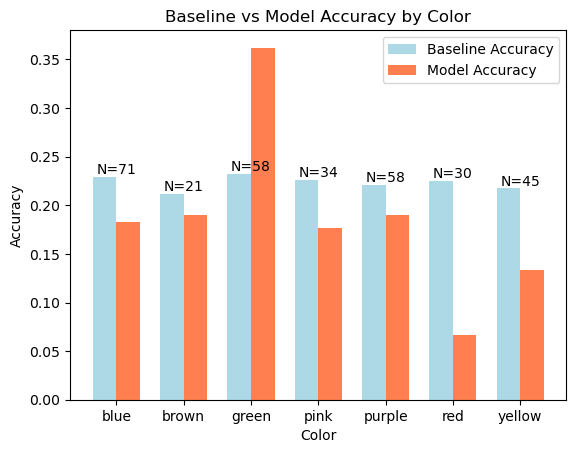

In [459]:
grouped_data = type0_df.groupby('question')[['accuracy', 'accuracy_baseline']].mean().reset_index()
counts = type0_df["question"].value_counts().reindex(grouped_data["question"]).values

###### PLOT WITH BASELINE #####
bar_width = 0.35
index = np.arange(len(grouped_data['question']))

# Create bar plots
fig, ax = plt.subplots()
bar1 = ax.bar(index, grouped_data['accuracy_baseline'], bar_width, label='Baseline Accuracy', color='lightblue')
bar2 = ax.bar(index + bar_width, grouped_data['accuracy'], bar_width, label='Model Accuracy', color='coral')

for bar, count in zip(bar1, counts):
    plt.text(bar.get_x() + bar.get_width() , bar.get_height(), f'N={count}', 
                ha='center', va='bottom', fontsize=10)

# Add labels, title, and legend
ax.set_xlabel('Color')
ax.set_ylabel('Accuracy')
ax.set_title('Baseline vs Model Accuracy by Color')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(grouped_data['question'])
ax.legend()

# Show plot
plt.show()

###### OLD PLOT #######
# plt.figure(figsize=(8, 4))

# bars = plt.bar(grouped_data["question"], grouped_data['accuracy'])

# # Add labels for the number of items on top of each bar
# for bar, count in zip(bars, counts):
#     plt.text(bar.get_x() + bar.get_width() , bar.get_height(), f'N={count}', 
#                 ha='center', va='bottom', fontsize=10)

# # Add labels and title
# plt.xlabel("Color")
# plt.ylabel('Accuracy')
# plt.title(f'Accuracy by color')
# plt.xticks(rotation=45)  # Rotate labels if needed

# # Display the plot
# plt.tight_layout()
# plt.show()

Now let us look at type 1 questions.

In [460]:
type1_df["kind"] = type1_df["question"].map(object_to_id)
type1_df.head()

/var/folders/p5/4f2jvjd16dzcqk4v24z60cpm0000gn/T/ipykernel_88956/1625770199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  type1_df["kind"] = type1_df["question"].map(object_to_id)


,question,choices,correct,type,model_response,model_response_color,correct_color,accuracy_baseline,accuracy,kind
317,truck_rot_s_10.jpg,"[blue, purple, green, brown]",[blue],1,0,blue,blue,0.25,1,truck_rot0
318,takeout_container_rot_s_6.jpg,"[green, blue, red, purple]",[green],1,1,blue,green,0.25,0,takeout_container_rot0
319,sugar_bowl_rot_s_9.jpg,"[blue, brown, pink, purple]",[blue],1,0,blue,blue,0.25,1,sugar_bowl_rot1
320,packingtape_rot_s_8.jpg,"[blue, pink, yellow, red]",[blue],1,0,blue,blue,0.25,1,packingtape_rot0
321,pitcher_rot_s_9.jpg,"[blue, pink, yellow, purple]",[blue],1,0,blue,blue,0.25,1,pitcher_rot1


In [461]:
grouped_data = type1_df.groupby("kind")[['accuracy', 'accuracy_baseline']].mean().reset_index()
# grouped_data = grouped_data[grouped_data['accuracy'] > 0] # only look at those ones with non zero accuracy
sorted_df = grouped_data.sort_values(by='accuracy',ascending=False)
sorted_df["accuracy_higher_than_baseline"] = (sorted_df["accuracy"] > sorted_df["accuracy_baseline"]).astype(int)
sorted_df
# print(f"Percentage of kinds that surpass the baseline: {sorted_df['accuracy_higher_than_baseline'].mean()}")
# sorted_df.to_csv("color_evaluation_accuracy_given_kind_pick_color.csv")

,kind,accuracy,accuracy_baseline,accuracy_higher_than_baseline
23,fakeapple_rot0,0.750000,0.25,1
94,watch_rot1,0.666667,0.25,1
92,valve_rot1,0.666667,0.25,1
91,valve_rot0,0.666667,0.25,1
90,usb_key_rot1,0.666667,0.25,1
...,...,...,...,...
22,extension_cord_rot1,0.000000,0.25,0
73,tape_dispenser_rot0,0.000000,0.25,0
72,takeout_container_rot1,0.000000,0.25,0
71,takeout_container_rot0,0.000000,0.25,0


In [462]:
print(f"Percentage of kinds that surpass the baseline: {sorted_df['accuracy_higher_than_baseline'].mean()}")

Percentage of kinds that surpass the baseline: 0.3157894736842105


# Part 6: Confusion Matrix

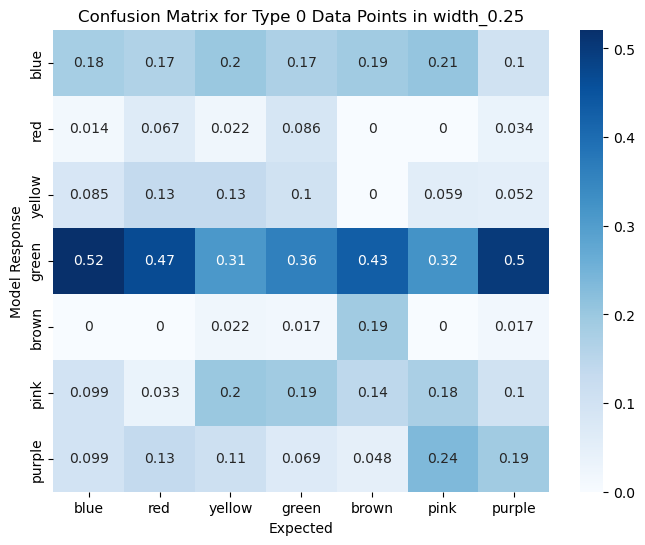

In [463]:
import seaborn as sns
import matplotlib.pyplot as plt

column_sums_0 = confusion_matrix_type0.sum(axis=0)
normalized_matrix_0 = confusion_matrix_type0 / column_sums_0
plt.figure(figsize=(8, 6))
sns.heatmap(normalized_matrix_0, annot=True, cmap="Blues", xticklabels=COLORS_TEST, yticklabels=COLORS_TEST)

# Titles and axis labels
plt.title(f"Confusion Matrix for Type 0 Data Points in {mode}")
plt.xlabel("Expected")
plt.ylabel("Model Response")
plt.show()

[[95. 18. 25. 60. 13. 21. 37.]
 [ 0.  5.  6. 15.  0.  7.  7.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  7. 12. 41.  8. 10. 20.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  2.  6.  0.  1.  4.]]


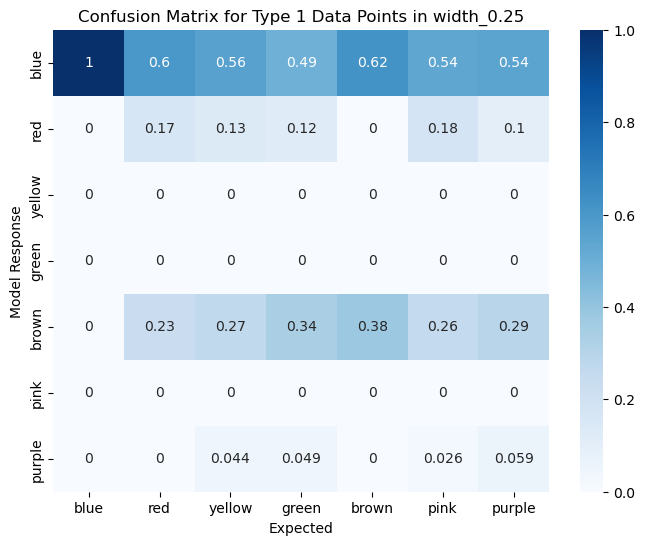

In [464]:
import seaborn as sns
import matplotlib.pyplot as plt

column_sums_1 = confusion_matrix_type1.sum(axis=0)
print(confusion_matrix_type1)
normalized_matrix_1 = confusion_matrix_type1 / column_sums_1
plt.figure(figsize=(8, 6))
sns.heatmap(normalized_matrix_1, annot=True, cmap="Blues", xticklabels=COLORS_TEST, yticklabels=COLORS_TEST)

# Titles and axis labels
plt.title(f"Confusion Matrix for Type 1 Data Points in {mode}")
plt.xlabel("Expected")
plt.ylabel("Model Response")
plt.show()